In [63]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['font.sans-serif'] = "Karla"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
sleep = pd.read_csv('sleep_cleaned.csv')

In [8]:
sleep = sleep[['tracking_start', 'tracking_end', 'quality']]
sleep['tracking_start'] = pd.to_datetime(sleep['tracking_start'])
sleep['tracking_end'] = pd.to_datetime(sleep['tracking_end'])

In [18]:
junior_spr = sleep[sleep['tracking_start'].dt.date < datetime.date(2020, 6, 15)]
junior_sum = sleep[sleep['tracking_start'].dt.date < datetime.date(2020, 9, 1)]
senior_fall = sleep[sleep['tracking_start'].dt.date < datetime.date(2020, 12, 15)]
senior_spr = sleep[sleep['tracking_start'].dt.date < datetime.date(2021, 6, 15)]
senior_sum = sleep[sleep['tracking_start'].dt.date < datetime.date(2021, 8, 15)]
frosh_fall = sleep[sleep['tracking_start'].dt.date < datetime.date(2021, 12, 20)]
frosh_iap = sleep[sleep['tracking_start'].dt.date < datetime.date(2022, 1, 31)]
frosh_spr = sleep[sleep['tracking_start'].dt.date < datetime.date(2022, 6, 20)]

In [19]:
junior_sum = sleep[sleep['tracking_start'].dt.date > datetime.date(2020, 6, 15)]
senior_fall = sleep[sleep['tracking_start'].dt.date > datetime.date(2020, 9, 1)]
senior_spr = sleep[sleep['tracking_start'].dt.date > datetime.date(2020, 12, 15)]
senior_sum = sleep[sleep['tracking_start'].dt.date > datetime.date(2021, 6, 15)]
frosh_fall = sleep[sleep['tracking_start'].dt.date > datetime.date(2021, 8, 15)]
frosh_iap = sleep[sleep['tracking_start'].dt.date > datetime.date(2021, 12, 20)]
frosh_spr = sleep[sleep['tracking_start'].dt.date > datetime.date(2022, 1, 31)]

In [24]:
junior_spr_avg = junior_spr['quality'].mean()
junior_sum_avg = junior_sum['quality'].mean()
senior_fall_avg = senior_fall['quality'].mean()
senior_spr_avg = senior_spr['quality'].mean()
senior_sum_avg = senior_sum['quality'].mean()
frosh_fall_avg = frosh_fall['quality'].mean()
frosh_iap_avg = frosh_iap['quality'].mean()
frosh_spr_avg = frosh_spr['quality'].mean()

In [25]:
time_periods = ["spring '20", "summer '20", "fall '20", "spring '21", 
                "summer '21", "fall '21", "winter '22", "spring '22"]
averages = [junior_spr_avg, junior_sum_avg, senior_fall_avg, senior_spr_avg,
           senior_sum_avg, frosh_fall_avg, frosh_iap_avg, frosh_spr_avg]

In [26]:
time_avgs = pd.DataFrame(list(zip(time_periods, averages)), columns =['time periods', 'averages'])
time_avgs

,time periods,averages
0,spring '20,0.821615
1,summer '20,0.725478
2,fall '20,0.712802
3,spring '21,0.697263
4,summer '21,0.653088
5,fall '21,0.643744
6,winter '22,0.646119
7,spring '22,0.637917


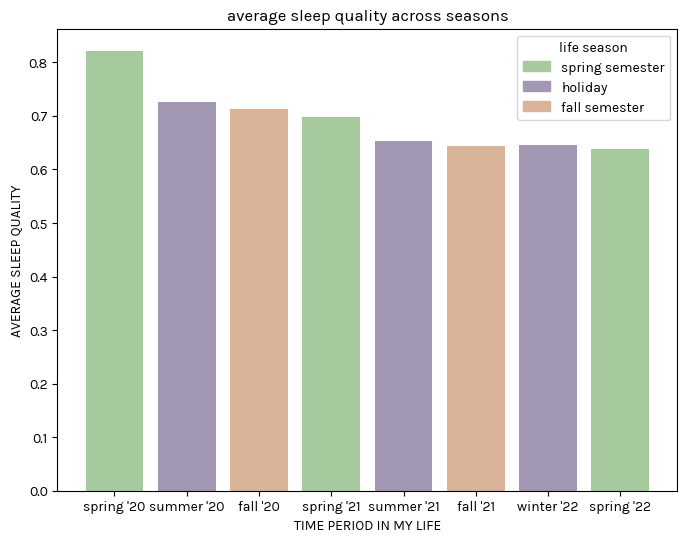

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

color_1 = mpatches.Patch(color = '#a6c99d', label = 'spring semester')
color_2 = mpatches.Patch(color = '#a298b3', label = 'holiday')
color_3 = mpatches.Patch(color = '#d9b498', label = 'fall semester')
ax.legend(title = 'life season', handles = [color_1, color_2, color_3])

bar_colors = ['#a6c99d', '#a298b3', '#d9b498', '#a6c99d', '#a298b3', '#d9b498', '#a298b3', '#a6c99d']
ax.bar(time_avgs['time periods'], time_avgs['averages'], color = bar_colors)


ax.set_xlabel('TIME PERIOD IN MY LIFE')
ax.set_ylabel('AVERAGE SLEEP QUALITY')
ax.set_title('average sleep quality across seasons')

#plt.show()

plt.savefig('sleepqualvsseason.png', dpi = 300, bbox_inches='tight')